In [10]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import tensorflow as tf
from keras.models import load_model
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [12]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'
# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [13]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
folders = glob('Datasets/Train/*')

x = Flatten()(vgg.output)


In [14]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)

In [15]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [28]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [26]:

training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 600 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


In [29]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=6,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/6
19/19 [==============================] - 222s 12s/step - loss: 0.2571 - accuracy: 0.9183 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 2/6
19/19 [==============================] - 219s 12s/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 7.6735e-04 - val_accuracy: 1.0000
Epoch 3/6
19/19 [==============================] - 218s 12s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.6220e-04 - val_accuracy: 1.0000
Epoch 4/6
19/19 [==============================] - 210s 11s/step - loss: 4.5804e-04 - accuracy: 1.0000 - val_loss: 2.2204e-04 - val_accuracy: 1.0000
Epoch 5/6
19/19 [==============================] - 220s 12s/step - loss: 5.2960e-04 - accuracy: 1.0000 - val_loss: 2.2866e-04 - val_accuracy: 1.0000
Epoch 6/6
19/19 [==============================] - 219s 12s/step - loss: 3.7198e-04 - accuracy: 1.0000 - val_loss: 1.9948e-04 - val_accuracy: 1.0000


In [33]:
model.save('final.h5')

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('1_acc')
plt.show()

: 

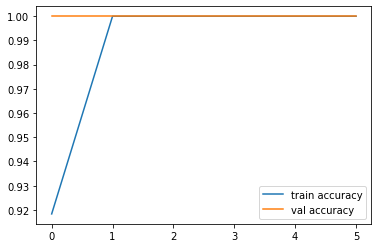

In [32]:
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.savefig('AccVal_acc')
plt.show()